In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image

plt.style.use('ggplot')

data = pd.read_csv('data/data.csv')

In [3]:
def create_income_animation(
        data, 
        income_col, 
        year_col, 
        truncate=None, 
        x_lim=None, 
        title="Household income", 
        xlabel="Household income (USD)", 
        ylabel="% of households", 
        save_as="income_animation.gif"
    ):
    """
    Creates and saves an animated histogram of income distribution over years.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the data.
    income_col (str): The name of the column representing income values.
    year_col (str): The name of the column representing year values.
    truncate (float, optional): A value to truncate the income values. Default is None.
    x_lim (tuple, optional): The limits for the x-axis as a tuple (min, max). Default is None.
    title (str, optional): The title of the plot. Default is "Household income".
    xlabel (str, optional): The label for the x-axis. Default is "Household income (USD)".
    ylabel (str, optional): The label for the y-axis. Default is "% of households".
    save_as (str, optional): The filename to save the animation. Default is "income_animation.gif".
    """
    if truncate is not None:
        data[income_col] = data[income_col].apply(lambda x: min(x, truncate))

    grouped_data = data.groupby(year_col)[income_col]
    overall_bins = pd.cut(data[income_col], bins=50, retbins=True)[1]

    fig, ax = plt.subplots()

    def animate(year):
        ax.clear()  # Clear the axis to update with new histogram
        incomes = grouped_data.get_group(year).dropna()
        
        # Calculate histogram data
        counts, bins = np.histogram(incomes, bins=overall_bins)
        percentages = (counts / counts.sum()) * 100
        
        # Create the histogram bars manually
        widths = np.diff(bins)
        ax.bar(bins[:-1], percentages, width=widths, color='blue', alpha=0.7)
        
        ax.set_title(f'{title} in {year}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_ylim(0, 100)  # Set fixed y-axis limits
        if x_lim is not None:
            ax.set_xlim(x_lim)

    years = data[year_col].unique()

    ani = animation.FuncAnimation(fig, animate, frames=years, repeat=False)
    ani.save(save_as)
    Image(filename=save_as)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Image

def create_income_animation(
        data, 
        income_col, 
        year_col, 
        truncate=None, 
        x_lim=None, 
        title="Household income", 
        xlabel="Household income (USD)", 
        ylabel="% of households", 
        save_as="income_animation.gif"
    ):
    """
    Creates and saves an animated histogram of income distribution over years.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the data.
    income_col (str): The name of the column representing income values.
    year_col (str): The name of the column representing year values.
    truncate (float, optional): A value to truncate the income values. Default is None.
    x_lim (tuple, optional): The limits for the x-axis as a tuple (min, max). Default is None.
    title (str, optional): The title of the plot. Default is "Household income".
    xlabel (str, optional): The label for the x-axis. Default is "Household income (USD)".
    ylabel (str, optional): The label for the y-axis. Default is "% of households".
    save_as (str, optional): The filename to save the animation. Default is "income_animation.gif".
    """
    if truncate is not None:
        data[income_col] = data[income_col].apply(lambda x: min(x, truncate))

    grouped_data = data.groupby(year_col)[income_col]
    overall_bins = pd.cut(data[income_col], bins=50, retbins=True)[1]

    # Calculate the maximum percentage across all years to set y-axis limits
    max_percentage = 0
    for year in data[year_col].unique():
        incomes = grouped_data.get_group(year).dropna()
        counts, _ = np.histogram(incomes, bins=overall_bins)
        max_percentage = max(max_percentage, np.max((counts / counts.sum()) * 100))

    # Set y-axis upper limit to 110% of the maximum percentage
    y_upper_lim = max_percentage * 1.1

    fig, ax = plt.subplots()

    def animate(year):
        ax.clear()  # Clear the axis to update with new histogram
        incomes = grouped_data.get_group(year).dropna()
        
        # Calculate histogram data
        counts, bins = np.histogram(incomes, bins=overall_bins)
        percentages = (counts / counts.sum()) * 100
        
        # Create the histogram bars manually
        widths = np.diff(bins)
        ax.bar(bins[:-1], percentages, width=widths, color='blue', alpha=0.7)
        
        ax.set_title(f'{title} in {year}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_ylim(0, y_upper_lim)  # Set dynamic y-axis limits
        if x_lim is not None:
            ax.set_xlim(x_lim)

    years = data[year_col].unique()

    ani = animation.FuncAnimation(fig, animate, frames=years, repeat=False)
    ani.save(save_as)
    Image(filename=save_as)

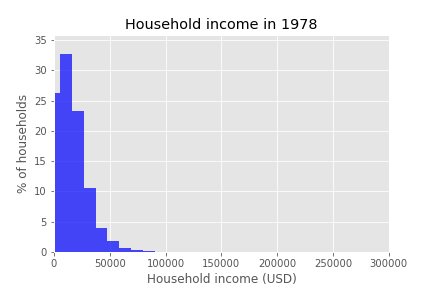

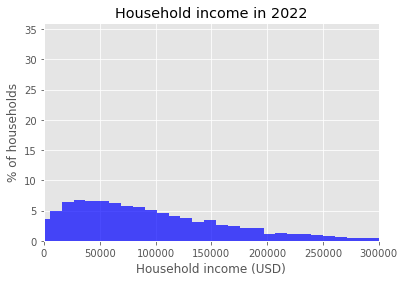

In [8]:
create_income_animation(
    data,
    'HHINCOME_2',
    'YEAR_1',
    truncate=500000,
    x_lim=(0, 300000),
    save_as='animations/household_income.gif'
)
Image(filename='animations/household_income.gif')

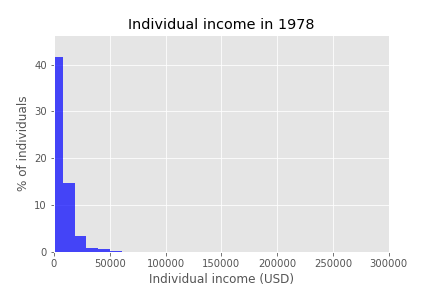

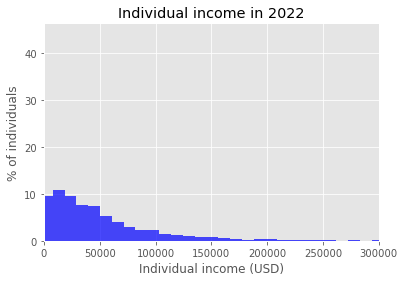

In [9]:
create_income_animation(
    data,
    'INCTOT_1', 
    'YEAR_1',
    title="Individual income",
    xlabel="Individual income (USD)",
    ylabel="% of individuals",
    truncate=500000,
    x_lim=(0, 300000),
    save_as='animations/individual_income.gif'
)
Image(filename='animations/individual_income.gif')

<ipython-input-5-5930277c589c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[income_col] = data[income_col].apply(lambda x: min(x, truncate))


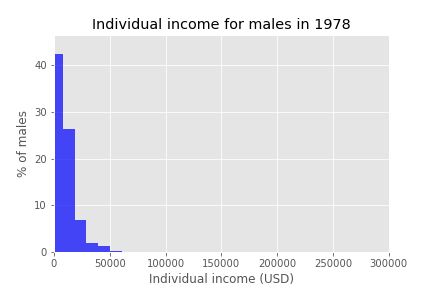

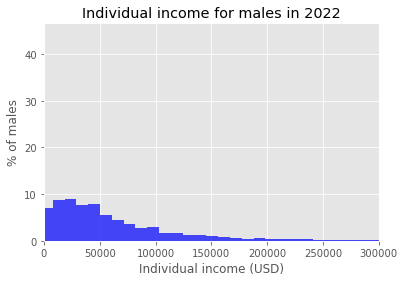

In [10]:
create_income_animation(
    data.loc[data['SEX_1'] == 1],
    'INCTOT_1', 
    'YEAR_1',
    title="Individual income for males",
    xlabel="Individual income (USD)",
    ylabel="% of males",
    truncate=500000,
    x_lim=(0, 300000),
    save_as='animations/male_income.gif'
)
Image(filename='animations/male_income.gif')

<ipython-input-5-5930277c589c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[income_col] = data[income_col].apply(lambda x: min(x, truncate))


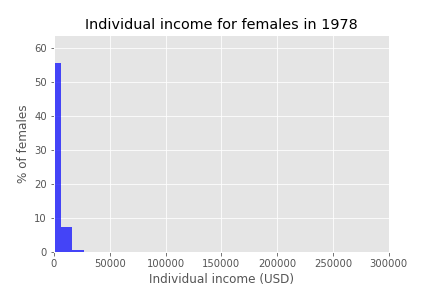

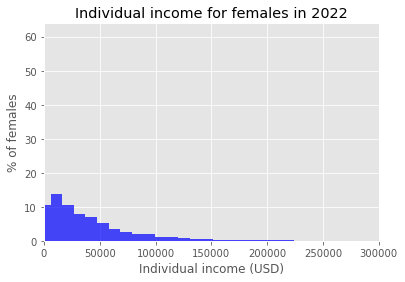

In [11]:
create_income_animation(
    data.loc[data['SEX_1'] == 2],
    'INCTOT_1', 
    'YEAR_1',
    title="Individual income for females",
    xlabel="Individual income (USD)",
    ylabel="% of females",
    truncate=500000,
    x_lim=(0, 300000),
    save_as='animations/female_income.gif'
)
Image(filename='animations/female_income.gif')

In [ ]:
INCTOT